In [1]:
import pandas as pd
import numpy as np
import os as os

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:


filepath = r"D:\New folder"
filename = "Online Retail.xlsx"

data = pd.read_excel(os.path.join(filepath, filename))

In [3]:
data.head(2)   # Top 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail(3)     # Bottom 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.shape

(541909, 8)

In [6]:
print ("Number of rows: ", data.shape[0])
print ("Number of columns: ", data.shape[1])


Number of rows:  541909
Number of columns:  8


In [7]:
data["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [8]:
print ("Number of Countries my products are sold: ", data["Country"].nunique())

Number of Countries my products are sold:  38


## <font color='green'> Column Understanding: </font>
    1. InvoiceNo (invoice_num): A number assigned to each transaction
    2. StockCode (stock_code): Product code
    3. Description (description): Product name
    4. Quantity (quantity): Number of products purchased for each transaction
    5. InvoiceDate (invoice_date): Timestamp for each transaction
    6. UnitPrice (unit_price): Product price per unit
    7. CustomerID (cust_id): Unique identifier each customer
    8. Country (country): Country name

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
data["Quantity"].dtype

dtype('int64')

In [11]:
missing_df = pd.DataFrame(data.isnull().sum(), columns = ["missing rows"])
missing_df["missing %"] = missing_df["missing rows"]*100/data.shape[0]
missing_df["missing %"] = missing_df["missing %"].round(2)
missing_df

,missing rows,missing %
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135080,24.93
Country,0,0.00


In [12]:
missing_df = missing_df.sort_values("missing %", ascending = True)
missing_df

,missing rows,missing %
InvoiceNo,0,0.00
StockCode,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
Country,0,0.00
Description,1454,0.27
CustomerID,135080,24.93


In [13]:
data[data["CustomerID"].isnull()].head()  # Python - Blanks (NaN, NaT)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [14]:
data_2 = data.copy()
data_2 = data_2.dropna(subset = ["CustomerID"])   # data_2.dropna() - all columns
data_2.shape

(406829, 8)

In [15]:
data_2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
data_2.shape

(406829, 8)

###  duplicates in data

In [17]:
duplicate_df = data_2[data_2.duplicated(keep = False)]
duplicate_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom


In [18]:
check_df = duplicate_df[(duplicate_df["StockCode"] == 22111) & (duplicate_df["InvoiceNo"] == 536409)]
check_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom


In [19]:
data_3 = data_2.drop_duplicates(keep = "first")
data_3.shape

(401604, 8)

In [20]:
data_3[(data_3["StockCode"] == 22111) & (data_3["InvoiceNo"] == 536409)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom


In [21]:
data_3["CustomerID"].dtype

dtype('float64')

In [22]:
data_3["CustomerID"].unique()  #[0]

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [23]:
data_3["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

### Change Float to string (object)



In [24]:
data_4 = data_3.copy()
data_4["CustomerID"] = data_4["CustomerID"].astype(int).astype(str)
data_4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [25]:
data_4["CustomerID"].unique()[0]

'17850'

###  change multiple columns

In [26]:
data_4["InvoiceNo"] = data_4["InvoiceNo"].astype(str)   # String
data_4["StockCode"] = data_4["StockCode"].astype(str)
data_4["Description"] = data_4["Description"].astype(str)
data_4["Country"] = data_4["Country"].astype(str)

In [27]:
string_cols = ["InvoiceNo", "StockCode", "Description", "Country"]
data_4[string_cols] = data_4[string_cols].astype(str)

In [28]:
int_cols = ["Quantity"]
data_4[int_cols] = data_4[int_cols].astype(int)

In [29]:
float_cols = ["UnitPrice"]
data_4[float_cols] = data_4[float_cols].astype(float)

In [30]:
data_4.describe().round(2)   # By default it shows only Integer & Float columns only

,Quantity,UnitPrice
count,401604.00,401604.00
mean,12.18,3.47
std,250.28,69.76
min,-80995.00,0.00
25%,2.00,1.25
50%,5.00,1.95
75%,12.00,3.75
max,80995.00,38970.00


## <font color='green'> Insights: </font>
    1. Why quantity is negative?
            Read data description - Canceled orders
    2. Why Unit price is 0?

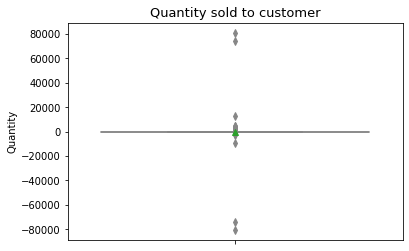

In [31]:
sns.boxplot(data_4["Quantity"], showmeans = True, color = "pink", orient="v")
plt.title("Quantity sold to customer",  fontsize = 13)

plt.show()

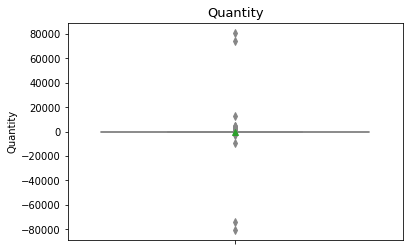

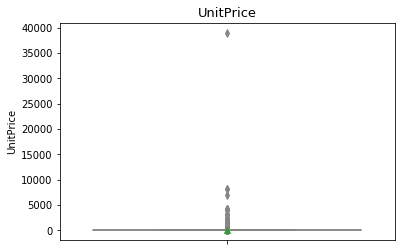

In [32]:
my_list = ["Quantity", "UnitPrice"]

for col in my_list:
    # One by one col goes in cols list (First: Quantity & then second: UnitPrice)
    sns.boxplot(data_4[col], showmeans = True, color = "pink", orient="v")
    plt.title(col,  fontsize = 13)
    plt.show()

## <font color='green'> Insights: </font>
    1. Negative quantity is canceled order - Do consider or not to consider?
    2. Why Quantity and Unit Price is having outlier?

### How much % of data is having negative quantity? 

In [33]:
data_4[(data_4["Quantity"] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [34]:
neg_qty = data_4[data_4["Quantity"] < 0]   # Negative qty df 
neg_perc = len(neg_qty)*100/len(data_4)    # Percentage formula
print ("% of data having negative quantity: {} %".format(round(neg_perc, 3)))   # print 

% of data having negative quantity: 2.209 %


### What if quantity was not negative and Invoice with "C" were considered as canceled? 

In [35]:
cancel_qty = data_4[data_4["InvoiceNo"].astype(str).str.contains("C")]
cancel_perc = len(cancel_qty)*100/len(data_4)
print ("% of data having cancelled invoice: {}%".format(round(cancel_perc, 3)))

% of data having cancelled invoice: 2.209%


In [36]:
cancel_qty["InvoiceNo"].nunique()

3654

In [37]:
data_5 = data_4[data_4["Quantity"] > 0]    # Positive Quantity 
data_6 = data_5[data_5["UnitPrice"] > 0]   # greater than 0 Cost 

### Lets now work on higher values 

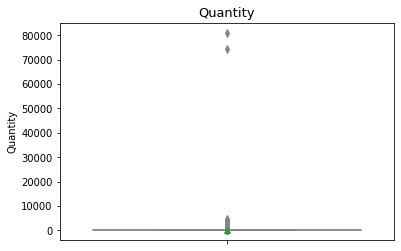

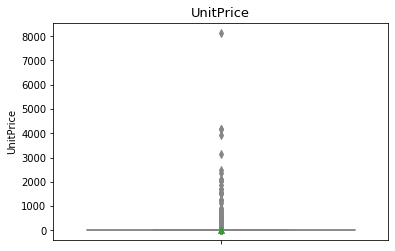

In [38]:
cols = ["Quantity", "UnitPrice"]
for col in cols:
    sns.boxplot(data_6[col], showmeans = True, color = "pink", orient="v")
    plt.title(col,  fontsize = 13)
    plt.show()

## <font color='green'> Insights: </font>
    1. There are high quantity (>50000)
    - Quantity high, can be high demand shoot up? New customer purschase?
    2. Also high Unit Price (> 5000)
    - What is so expensive?

In [39]:
data_6[data_6["UnitPrice"] > 5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


### How is the price of POST in complete 1 year? 

In [40]:
data_check = data_6[data_6["StockCode"] == "POST"]
data_check

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526,Germany


In [41]:
data_check["UnitPrice"].median()
# Mean = 31.5 & Median = 18

18.0

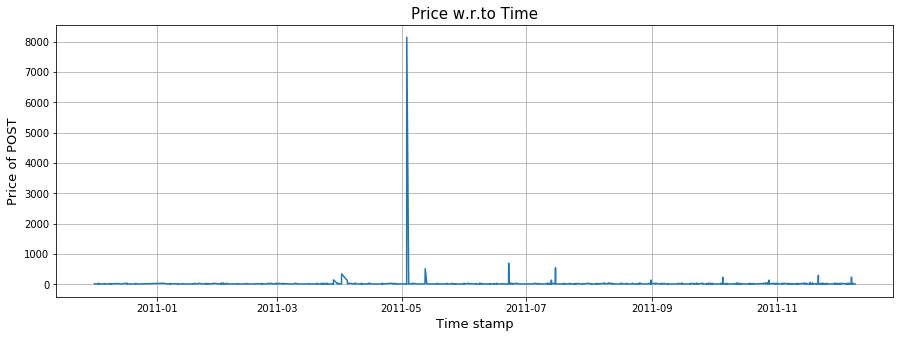

In [42]:
plt.figure(figsize = (15,5))
plt.plot(data_check["InvoiceDate"], data_check["UnitPrice"])
plt.xlabel("Time stamp", fontsize = 13)
plt.ylabel("Price of POST", fontsize = 13)
plt.title("Price w.r.to Time", fontsize = 15)
plt.grid()
plt.show()

## <font color='green'> Insights: </font>
    1. thats a outlier. 
   

In [43]:
data_6[(data_6["StockCode"] == "POST") & (data_6["CustomerID"] == "16029")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [44]:
data_check = data_6[(data_6["StockCode"] == "POST")]

data_7 = data_6.copy()

data_7["UnitPrice"] = np.where((data_7["UnitPrice"] > 2000) & (data_7["StockCode"] == "POST"),   # Condition
         data_check["UnitPrice"].median(),  # If condition is True
         data_7["UnitPrice"])  # If Condition is False

In [45]:
data_7[(data_7["StockCode"] == "POST") & (data_7["CustomerID"] == "16029")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,18.0,16029,United Kingdom


In [46]:
# data_6["UnitPrice"].replace(data_6["UnitPrice"] >5000, data_check["UnitPrice"].median()) 

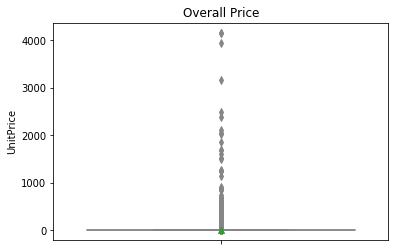

In [47]:
sns.boxplot(data_7["UnitPrice"], showmeans = True, color = "pink", orient="v")
plt.title("Overall Price")
plt.show()

### new columns using existing columns
- Amount = Quantity * Price

In [48]:
data_8 = data_7.copy()
data_8["Amount"] = data_8["Quantity"]*data_8["UnitPrice"]
data_8.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### How many orders per country?

In [49]:
bar_df = pd.DataFrame(data_8.groupby(["Country"])["InvoiceNo"].nunique())
#bar_df = bar_df.reset_index()
bar_df.head()

,InvoiceNo
Country,
Australia,57
Austria,17
Bahrain,2
Belgium,98
Brazil,1


In [50]:
bar_df=bar_df.rename(columns = {"InvoiceNo":"Count of Orders"})
bar_df=bar_df.sort_values("Count of Orders",ascending=False)
bar_df.head()

,Count of Orders
Country,
United Kingdom,16646
Germany,457
France,389
EIRE,260
Belgium,98


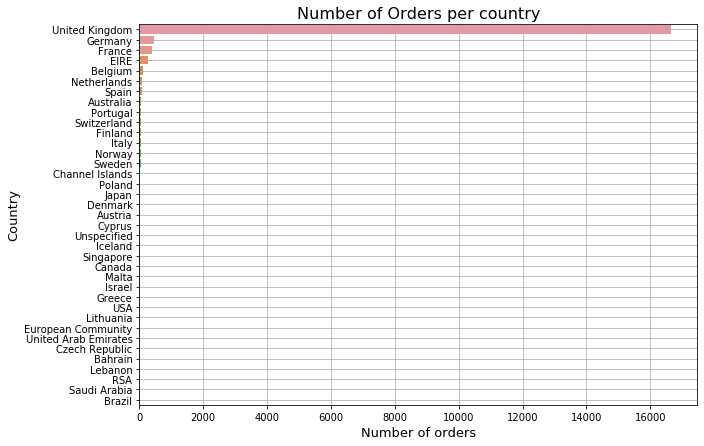

In [51]:
plt.figure(figsize=(10,7))
sns.barplot(x='Count of Orders',y = bar_df.index ,data = bar_df)
plt.xlabel('Number of orders',fontsize=13)
plt.ylabel('Country',fontsize=13)
plt.title('Number of Orders per country',fontsize=16)
plt.grid()
plt.show()

### What is the contribution to UK?
- Percentage

In [52]:
uk_orders = data_8[data_8["Country"] == "United Kingdom"]["InvoiceNo"].nunique()   # Data - Data_8
all_orders = data_8["InvoiceNo"].nunique()
uk_perc = uk_orders*100/all_orders
print ("Percentage of Data having UK country: ", round(uk_perc,2))  # Manually

Percentage of Data having UK country:  89.82


In [53]:
uk_orders, all_orders

(16646, 18532)

In [54]:
bar_df[bar_df.index == 'United Kingdom']#["Count of Orders"][0]

,Count of Orders
Country,
United Kingdom,16646


In [55]:
#uk_orders = bar_df[bar_df.index == 'United Kingdom']["Count of Orders"][0]      # bar_df (plot bar plot)

###  contribution of each country


In [56]:
bar_df["Relative frequency Invoice"] = round(bar_df["Count of Orders"]*100/bar_df["Count of Orders"].sum(), 3)
bar_df["Cummulative Relative"] = bar_df["Relative frequency Invoice"].cumsum()

bar_df.head()

,Count of Orders,Relative frequency Invoice,Cummulative Relative
Country,,,
United Kingdom,16646,89.823,89.823
Germany,457,2.466,92.289
France,389,2.099,94.388
EIRE,260,1.403,95.791
Belgium,98,0.529,96.320


In [57]:
bar_df.tail()

,Count of Orders,Relative frequency Invoice,Cummulative Relative
Country,,,
Bahrain,2,0.011,99.980
Lebanon,1,0.005,99.985
RSA,1,0.005,99.990
Saudi Arabia,1,0.005,99.995
Brazil,1,0.005,100.000


###  plot Relative & Cummulative together


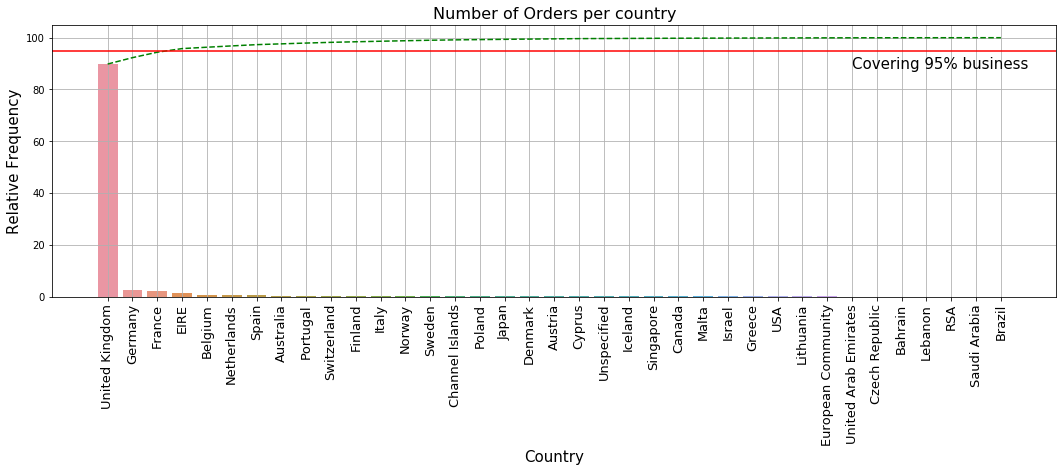

In [58]:
plt.figure(figsize=(18,5))   # Change the figure size 
sns.barplot(x =  bar_df.index, y="Relative frequency Invoice" , data=bar_df)   # Bar plot
plt.plot(bar_df["Cummulative Relative"], ls = "--", color = "green")      # Line Plot
# Y-axis
plt.ylabel('Relative Frequency',fontsize=15)    
#plt.ylim(0,1100)
#plt.yticks(np.arange(0, 110, 50))

# X-axis
plt.xlabel('Country',fontsize=15)
plt.axhline(95, color = "red")
plt.xticks(rotation = 90, fontsize = 13)

plt.title('Number of Orders per country',fontsize=16)
plt.text(30, 88, "Covering 95% business", fontsize = 15)
plt.grid()
plt.show()

## <font color='green'> Insights: </font>
    1. UK has most transcations in last 1 year
    2. 89% of data is having UK as country
    3. 95% of orders are covered by 4 countries

### What if business wants to see contribution apart from UK?

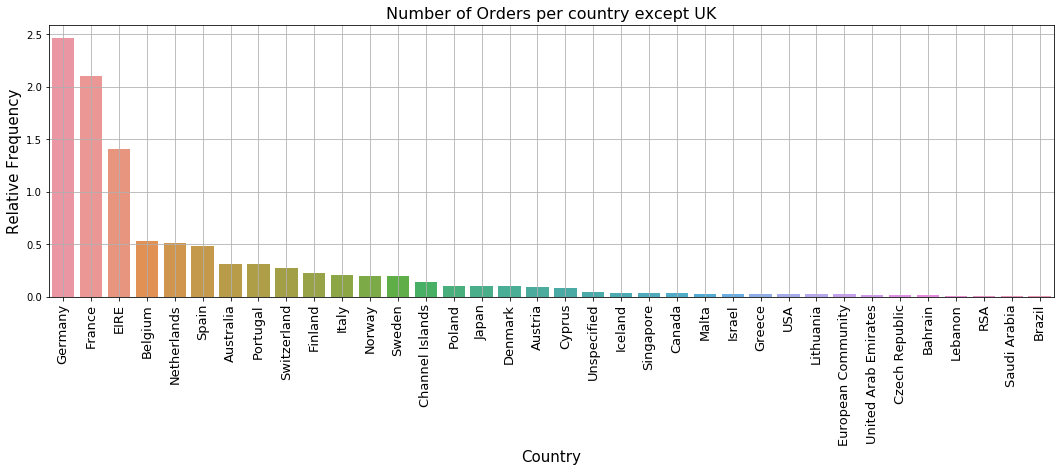

In [59]:
bar_df_noUK = bar_df[(bar_df.index != "United Kingdom")]
#bar_df[1:]  # : onwards

plt.figure(figsize=(18,5))   # Change the figure size 
sns.barplot(x = bar_df_noUK.index,y="Relative frequency Invoice" ,data = bar_df_noUK)   # Bar plot
#plt.plot(bar_df_noUK["Cummulative Relative"], ls = "--", color = "green")      # Line Plot
# Y-axis
plt.ylabel('Relative Frequency',fontsize=15)    

# X-axis
plt.xlabel('Country',fontsize=15)
plt.xticks(rotation = 90, fontsize = 13)

plt.title('Number of Orders per country except UK',fontsize=16)
plt.grid()
plt.show()

### What is average amount spend by country? Is UK top in that also?

In [60]:
bar_amt_df = pd.DataFrame(data_8.groupby("Country")["Amount"].mean())
bar_amt_df = bar_amt_df.sort_values("Amount", ascending = False)
bar_amt_df.head()

,Amount
Country,
Netherlands,121.003111
Australia,117.234386
Japan,116.561900
Singapore,95.852658
Sweden,85.261844


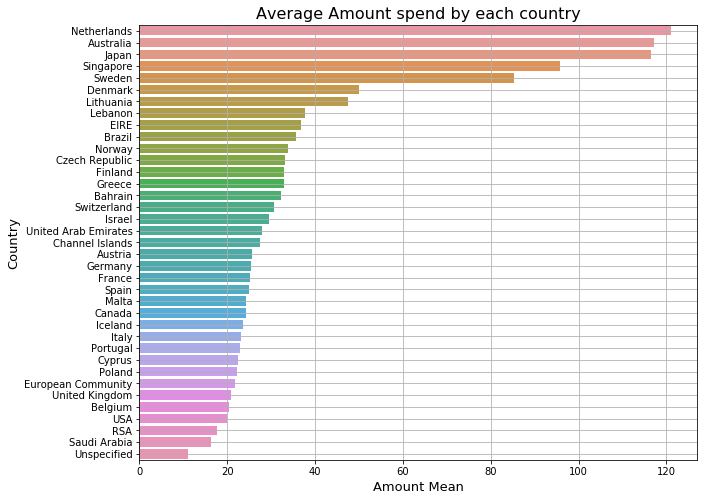

In [61]:
plt.figure(figsize = (10,8))
sns.barplot(x = "Amount", y = bar_amt_df.index , data = bar_amt_df)
plt.xlabel("Amount Mean",  fontsize = 13)
plt.ylabel('Country', fontsize = 13)
plt.title("Average Amount spend by each country", fontsize=16)
plt.grid()
plt.show()

## <font color='green'> Insights: </font>
    1. Even though UK has high orders, average amonut spend by Nerthands is high (roughly > 120)
    2. Followed by Australia & Japan(115 approx)
    3. Lowest is Saudi Arabia

### How to get date from datetime column?

In [62]:
data_9 = data_8.copy()
data_9["Date"] = data_9["InvoiceDate"].dt.date   # datetime: dt
data_9.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [63]:
data_9["Date"].dtype   # Object -> String

dtype('O')

In [64]:
data_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      392692 non-null object
StockCode      392692 non-null object
Description    392692 non-null object
Quantity       392692 non-null int32
InvoiceDate    392692 non-null datetime64[ns]
UnitPrice      392692 non-null float64
CustomerID     392692 non-null object
Country        392692 non-null object
Amount         392692 non-null float64
Date           392692 non-null object
dtypes: datetime64[ns](1), float64(2), int32(1), object(6)
memory usage: 31.5+ MB


### change data type of string(object) to datetime

In [65]:
data_9["Date"] = pd.to_datetime(data_9["Date"])
data_9.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [66]:
data_9["Date"].dtype

dtype('<M8[ns]')

In [67]:
data_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      392692 non-null object
StockCode      392692 non-null object
Description    392692 non-null object
Quantity       392692 non-null int32
InvoiceDate    392692 non-null datetime64[ns]
UnitPrice      392692 non-null float64
CustomerID     392692 non-null object
Country        392692 non-null object
Amount         392692 non-null float64
Date           392692 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int32(1), object(5)
memory usage: 31.5+ MB


In [68]:
data_9["Year"] = data_9["InvoiceDate"].dt.year
data_9.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010


In [69]:
data_9.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Year
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-09,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-09,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-09,2011
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-09,2011


In [70]:
data_9["Year"].unique()

array([2010, 2011], dtype=int64)

### How to get Year-Month?

In [71]:
data_9["Year_Month"] = data_9["InvoiceDate"].dt.strftime('%Y%m')   # return string with given format
data_9.head(2)   # Y - 2010, y - 10

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Year,Year_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010,201012


### How to get Day?
- Monday, Tuesday ..

In [72]:
data_9["Day"] = data_9["InvoiceDate"].dt.strftime("%A")     #dt.weekday_name
data_9.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Year,Year_Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010,201012,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010,201012,Wednesday


### How to get Hour?
- 1 to 24 ..

In [73]:
data_9["Hour"] = data_9["InvoiceDate"].dt.hour
data_9.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Year,Year_Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010,201012,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010,201012,Wednesday,8


In [74]:
data_9["Year_Month"].nunique()

13

### How to get sales for each month?

In [75]:
month_sales = pd.DataFrame(data_9.groupby("Year_Month")["InvoiceNo"].nunique())
month_sales = month_sales.sort_values("InvoiceNo", ascending = False)
month_sales

,InvoiceNo
Year_Month,
201111,2657
201110,1929
201109,1755
201105,1555
201012,1400
201106,1393
201107,1331
201103,1321
201108,1280


In [76]:
month_sales.index

Index(['201111', '201110', '201109', '201105', '201012', '201106', '201107',
       '201103', '201108', '201104', '201102', '201101', '201112'],
      dtype='object', name='Year_Month')

### Visualize this dataframe at month level
- Bar plot with months in x axis

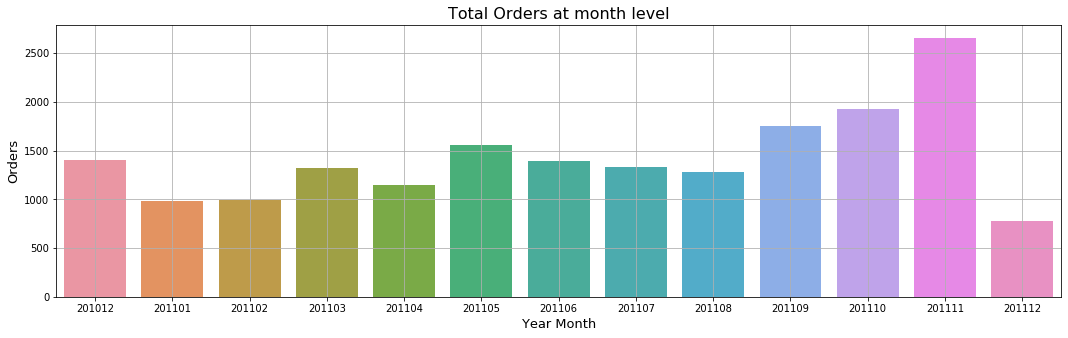

In [77]:
plt.figure(figsize = (18,5))
sns.barplot(x = month_sales.index, y = "InvoiceNo", data = month_sales)

plt.xlabel("Year Month",  fontsize = 13)
plt.ylabel('Orders', fontsize = 13)
plt.title("Total Orders at month level", fontsize=16)
plt.grid()
plt.show()

### Visualize this dataframe at day level
- Bar plot with day in x axis

In [78]:
day_sales = pd.DataFrame(data_9.groupby("Day")["InvoiceNo"].nunique()) 
day_sales

,InvoiceNo
Day,
Friday,2829
Monday,2863
Sunday,2169
Thursday,4032
Tuesday,3184
Wednesday,3455


In [79]:
day_sales.index = pd.Categorical(day_sales.index, 
               categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                ordered=True)
day_sales.index      # M < Tue< wed < thru < Fri < Sat < Sunday

CategoricalIndex(['Friday', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
                  'Wednesday'],
                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True, dtype='category')

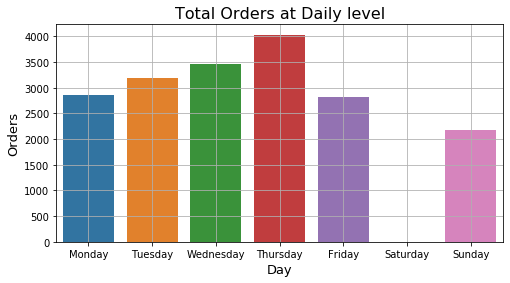

In [80]:
plt.figure(figsize = (8,4))
sns.barplot(x = day_sales.index, y = "InvoiceNo", data = day_sales)

plt.xlabel("Day",  fontsize = 13)
plt.ylabel('Orders', fontsize = 13)
plt.title("Total Orders at Daily level", fontsize=16)
plt.grid()
plt.show()

### Visualize this dataframe at Hour level
- Bar plot with hour in x axis

In [81]:
hour_sales = pd.DataFrame(data_9.groupby("Hour")["InvoiceNo"].nunique()) 

hour_sales

,InvoiceNo
Hour,
6,1
7,29
8,555
9,1393
10,2226
11,2277
12,3130
13,2636
14,2274


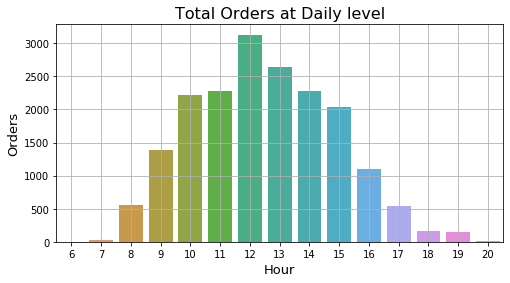

In [82]:
plt.figure(figsize = (8,4))
sns.barplot(x = hour_sales.index, y = "InvoiceNo", data = hour_sales)

plt.xlabel("Hour",  fontsize = 13)
plt.ylabel('Orders', fontsize = 13)
plt.title("Total Orders at Daily level", fontsize=16)
plt.grid()
plt.show()

## <font color='green'> Insights: </font>
    1. November 2011 has highest orders
    2. Followed by Oct and Sept 2011 
    3. Thursday has highest sales
    4. There are no orders on saturday
    5. Sales starts from 7am to 8pm, with highest during noon

### Is quantity actually having outlier?

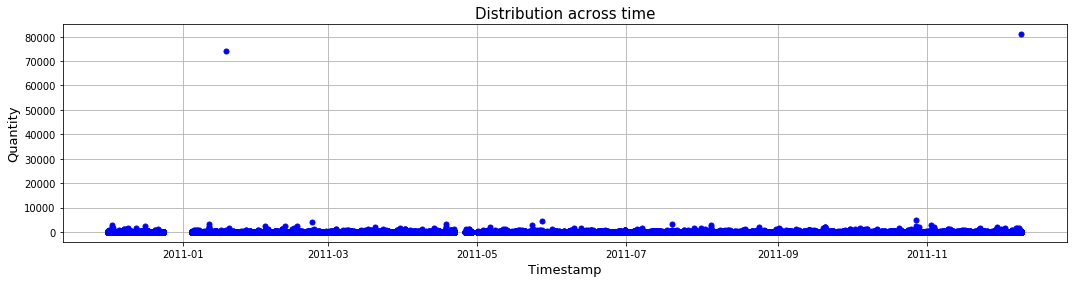

In [83]:
plt.figure(figsize = (18,4))
plt.plot(data_9["InvoiceDate"], data_9["Quantity"], "bo", markersize = 5)
plt.ylabel("Quantity", fontsize = 13)
plt.xlabel("Timestamp", fontsize = 13)
plt.title("Distribution across time", fontsize = 15)
plt.grid()
plt.show()

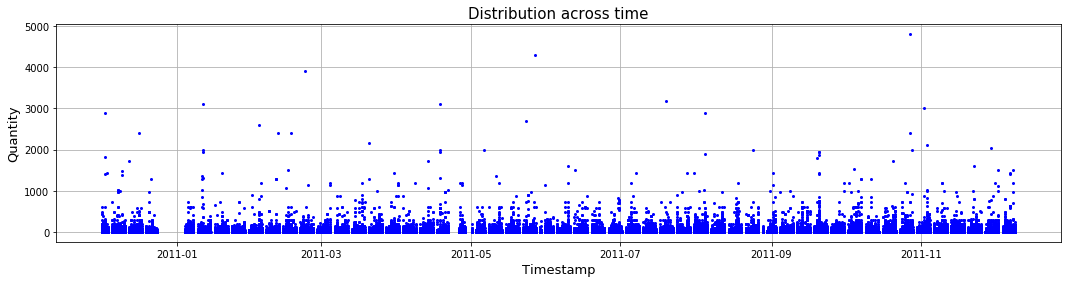

In [84]:
data_10 = data_9[data_9["Quantity"] < 10000]   # Either drop or manupilate

plt.figure(figsize = (18,4))
plt.plot(data_10["InvoiceDate"], data_10["Quantity"], "bo", markersize = 2)
plt.ylabel("Quantity", fontsize = 13)
plt.xlabel("Timestamp", fontsize = 13)
plt.title("Distribution across time", fontsize = 15)
plt.grid()
plt.show()

## <font color='green'> Insights: </font>
    1. There are some outliers in the Quantity 
    2. After removal brings visuals more resonable

### How many dates are available in data?

In [85]:
available_days = data_10["Date"].nunique()
print ("Available Days in data: ", available_days)

Available Days in data:  305


### How many dates should be ideally in data?

In [86]:
actual_days = data_10["Date"].max() - data_10["Date"].min()
print ("Actual Days in data: ", actual_days)

Actual Days in data:  373 days 00:00:00


### Where dates variation is coming? Is it regular or irregular?

In [87]:
data_11 = data_10.copy()

data_11["Date_Diff"] = data_11["Date"].diff().dt.days
data_11["Date_Diff"] = data_11["Date_Diff"].fillna(0).astype(int)
data_11.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Year,Year_Month,Day,Hour,Date_Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010,201012,Wednesday,8,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010,201012,Wednesday,8,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010,201012,Wednesday,8,0


In [88]:
data_11["Date_Diff"].unique() #.tolist()   # Dates Difference

array([ 0,  1,  2, 12,  5,  3], dtype=int64)

In [89]:
data_11["Date_Diff"].value_counts()     # Date Difference distribution

0     392386
1        249
2         52
12         1
5          1
3          1
Name: Date_Diff, dtype: int64

###  12 days of gap?

In [90]:
data_11[data_11["Date_Diff"] == 12]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Year,Year_Month,Day,Hour,Date_Diff
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5,2011-01-04,2011,201101,Tuesday,10,12


In [91]:
data_11.loc[42452:42481]  # loc works - Location

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Year,Year_Month,Day,Hour,Date_Diff
42452,539988,47559B,TEA TIME OVEN GLOVE,2,2010-12-23 16:06:00,1.25,18116,United Kingdom,2.5,2010-12-23,2010,201012,Thursday,16,0
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5,2011-01-04,2011,201101,Tuesday,10,12


## <font color='green'> Insights: </font>
    1. No Data from 24th Dec 2010 to 3rd Jan 2011  
    2. Seems Christmas and new year time
    3. No data collection during holidays

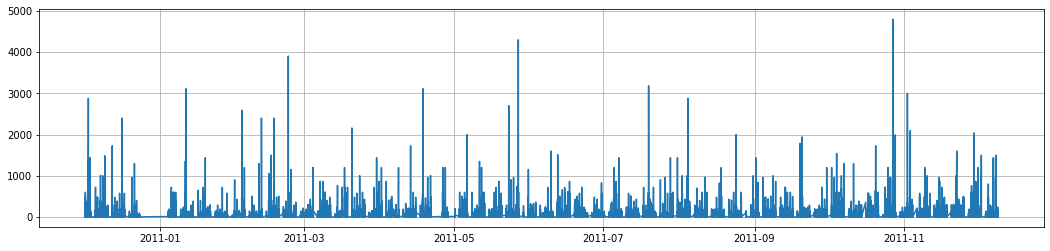

In [92]:
plt.figure(figsize = (18,4))
plt.plot(data_11["InvoiceDate"], data_11["Quantity"])
plt.grid()
plt.show()

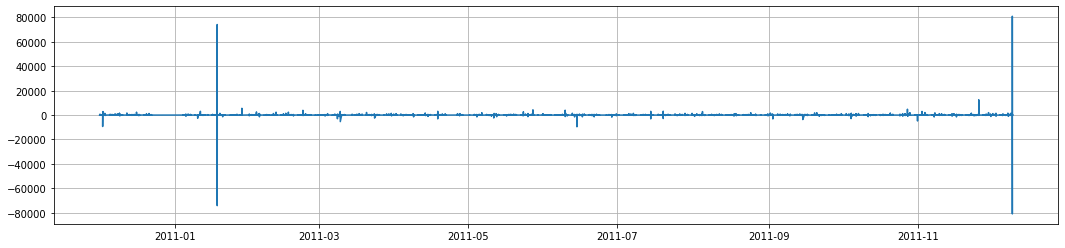

In [93]:
plt.figure(figsize = (18,4))
plt.plot(data["InvoiceDate"], data["Quantity"])
plt.grid()
plt.show()

### Top customers by Amount?

In [94]:
# Top customer based on amount

top_customers = pd.DataFrame(data_11.groupby("CustomerID")["Amount"].sum())   
top_customers = top_customers.sort_values("Amount", ascending = False)
# Top 5 customers
top_customers.head()#.index[:5]

,Amount
CustomerID,
14646,280206.02
18102,259657.30
17450,194390.79
14911,143711.17
12415,124914.53


### Top products by amount?

In [95]:
# Top Products based on amount
top_products = pd.DataFrame(data_11.groupby(["StockCode", "Description"])["Amount"].sum())   
top_products = top_products.sort_values("Amount", ascending = False)
top_products = top_products.reset_index(level = 0)   # For multi index level is used
# Top rows
top_products.head()

,StockCode,Amount
Description,,
REGENCY CAKESTAND 3 TIER,22423,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,85123A,100392.10
JUMBO BAG RED RETROSPOT,85099B,85040.54
POSTAGE,POST,69679.21
PARTY BUNTING,47566,68785.23


### Top customers by quantity?

In [96]:
## Top customer based on amount

top_customers = pd.DataFrame(data_11.groupby("CustomerID")["Quantity"].sum())   
top_customers = top_customers.sort_values("Quantity", ascending = False)
# Top 5 customers
top_customers.index[:5]   # instead of head 

Index(['14646', '14911', '12415', '17450', '17511'], dtype='object', name='CustomerID')

### Get descriptive part of all columns?

In [97]:
data_11.describe(include = "all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Year,Year_Month,Day,Hour,Date_Diff
count,392690,392690,392690,392690.000000,392690,392690.000000,392690,392690,392690.000000,392690,392690.000000,392690,392690,392690.000000,392690.000000
unique,18530,3664,3876,NaN,17280,NaN,4337,37,NaN,305,NaN,13,6,NaN,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,17841,United Kingdom,NaN,2011-11-06 00:00:00,NaN,201111,Thursday,NaN,NaN
freq,542,2023,2016,NaN,542,NaN,7676,349201,NaN,3340,NaN,63168,79243,NaN,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,2010-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,2011-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.724521,NaN,3.105232,NaN,NaN,21.985360,NaN,2010.934630,NaN,NaN,12.721549,0.000950
std,NaN,NaN,NaN,43.083646,NaN,18.055040,NaN,NaN,95.898983,NaN,0.247177,NaN,NaN,2.276655,0.040201
min,NaN,NaN,NaN,1.000000,NaN,0.001000,NaN,NaN,0.001000,NaN,2010.000000,NaN,NaN,6.000000,0.000000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,NaN,NaN,4.950000,NaN,2011.000000,NaN,NaN,11.000000,0.000000


### Get countries in original data?

In [98]:
data["Country"].nunique()     # Orginal data 

38

### Where is the difference?

In [99]:
last_list = data_11["Country"].unique().tolist()   # Data 11 - 37 countries
org_list = data["Country"].unique().tolist()       # Data - 38 Countries
set(org_list)- set(last_list)     # Where is the difference ? Which country is not there?

{'Hong Kong'}

In [100]:
#data[data["Country"] == "Hong Kong"]    # Why Hong Kong is not there?

### Why Hong Kong is missing?

In [101]:
data[data["Country"] == "Hong Kong"]["CustomerID"].unique()   # No Customer info (dropna have droped these rows)

array([nan])

### Whats Revenue?

In [102]:
revenue = data_11["Amount"].sum()   # Revenue should be ideally in $ Million
revenue

8633430.943999998

### User defined function basics !!

In [103]:
def sub_cost(x , y):
    z = x - y
    return z

In [104]:
sub_cost(2.870, 50)

-47.13

In [105]:
ID = "POST"
stock_1 = data_11[data_11["StockCode"] == ID]
col = "UnitPrice"

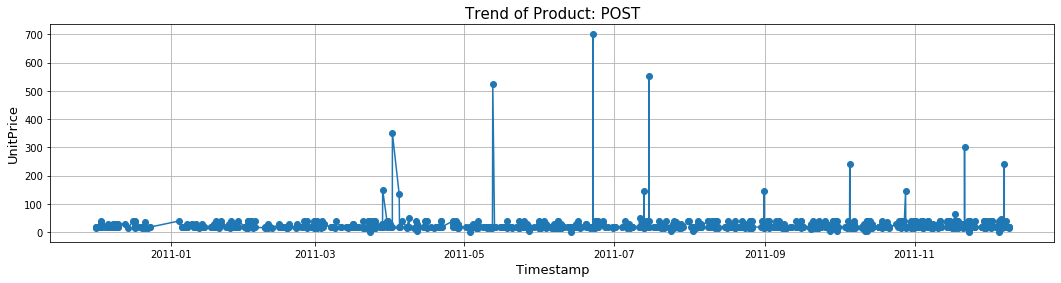

In [106]:
plt.figure(figsize = (18,4))
plt.plot(stock_1["InvoiceDate"], stock_1[col], "o-")
plt.xlabel("Timestamp", fontsize = 13)
plt.ylabel(col, fontsize = 13)
plt.title("Trend of Product: " + ID, fontsize = 15)
plt.grid()
plt.show()

In [107]:
def time_series_plot(data, x, y, ID):
    '''
    User defined function 
    '''
    stock_1 = data[data["StockCode"] == ID]   # data
    # Plot starts
    plt.figure(figsize = (18,4))
    plt.plot(stock_1[x], stock_1[y], "o-", markersize = 5)
    plt.xlabel("Timestamp", fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title(y + " Trend of Product: " + ID, fontsize = 15)
    plt.grid()
    plt.show()

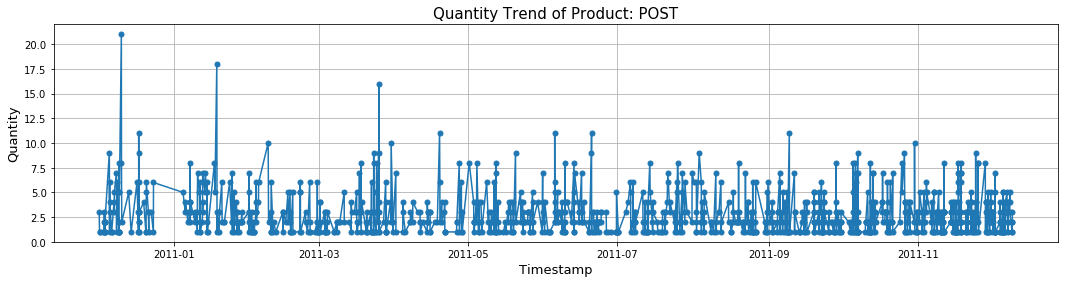

In [108]:
time_series_plot(data = data_5,  x = "InvoiceDate", y = "Quantity", ID =  "POST")    # User  defined function